This notebook allows for data visualization of the dataset and a widget to randomly inspect a datapoint.

Instructions to access the data:


1.   Before running the next cell, make sure you have access to the shared folder that contains the data in your google drive. Make sure that you are using the same drive account as for this colab.
2.   Find the legal_brief_dataset directory in your "Shared with me" drive Gdrive.
3.   Click the 3 vertical dots for "More actions" on the right of the screen for the directory.
4.   Over over the "Organize" option.
5.   Click the "Add shortcut" options.
6.   In the menu that pops up, click "All Locations" on the right and add My Drive as a shortcut.
7.   Repeat this process for the brief_pdfs directory

You should now be able to run the cell to load the data.

In [ ]:
%pip install pdf2image
%apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (262 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [13]:
import pandas as pd
df = pd.read_json('../data/new_dataset/new_data_03212025.jsonl', lines=True)

If you open the Table of Contents in the toolbar on the left, you can skip to the widgets to inspect the data. It is recommended that you run all cells first however.

In [14]:
df.head()

,filename,text,toc,content,docket_num,court,token_count,arguments,cleaned_text_alt,cleaned_content_alt,cleaned_args,sections_alt,url,arg_structure
0,Docket23-1275_Brief001.pdf,\n No. 23-1275 \nIn the Supreme Court of the...,\n No. 23-1275 \nIn the Supreme Court of the...,................................ ..............,23-1275,SCOTUS,11528,I. The any-qualified-provider provision does n...,\n No. 23-1275 \nIn the Supreme Court of the...,.............................. ..................,[I. The any-qualified-provider provision does ...,[{'I. The any-qualified-provider provision doe...,https://www.supremecourt.gov/docket/docketfile...,"[{'index': 0, 'header': 'I. The any-qualified-..."
1,Docket23-1275_Brief002.pdf,NO. 23-1275 \nIN THE \nSupreme Court of the Un...,NO. 23-1275 \nIN THE \nSupreme Court of the Un...,................................................,23-1275,SCOTUS,14888,I. The any-qualified-provider provision does n...,NO. 23-1275 \nIN THE \nSupreme Court of the Un...,.................................................,[I. The any-qualified-provider provision does ...,[{'I. The any-qualified-provider provision doe...,https://www.supremecourt.gov/docket/docketfile...,"[{'index': 0, 'header': 'I. The any-qualified-..."
2,Docket23-1275_Brief003.pdf,No. 23-1275 \nIN THE \nSupreme Court of the ...,No. 23-1275 \nIN THE \nSupreme Court of the ...,................................ ..............,23-1275,SCOTUS,12633,I. PPSAT IS AN EXEMPLARY PROVIDER OFFERING VI...,No. 23-1275 \nIN THE \nSupreme Court of the ...,.............................. ..................,[I. PPSAT IS AN EXEMPLARY PROVIDER OFFERING V...,[{'I. PPSAT IS AN EXEMPLARY PROVIDER OFFERING...,https://www.supremecourt.gov/docket/docketfile...,"[{'index': 0, 'header': 'I. PPSAT IS AN EXEMP..."
3,Docket23-1275_Brief004.pdf,\n \n \nNo. 23-1275 \nIn the Supreme Court of...,\n \n \nNo. 23-1275 \nIn the Supreme Court of...,................................................,23-1275,SCOTUS,16883,The Free-Choice-Of-Provider Provision Unambigu...,\n \n \nNo. 23-1275 \nIn the Supreme Court of...,.................................................,[The Free-Choice-Of-Provider Provision Unambig...,[{'D. The Free-Choice-Of-Provider Provision’s ...,https://www.supremecourt.gov/docket/docketfile...,"[{'index': 0, 'header': 'The Free-Choice-Of-Pr..."
4,Docket24-249_Brief002.pdf,\n No. 24-249 \nIn the Supreme Court of the U...,\n No. 24-249 \nIn the Supreme Court of the U...,................................ ..............,24-249,SCOTUS,11679,A. Proof of discriminatory intent is not requi...,\n No. 24-249 \nIn the Supreme Court of the U...,.............................. ..................,[A. Proof of discriminatory intent is not requ...,[{'2. To obtain compensatory damages for Title...,https://www.supremecourt.gov/docket/docketfile...,"[{'index': 0, 'header': 'A. Proof of discrimin..."


# Preprocessing

In [15]:
# Count number of rows where the split failed
# Calculate the string lengths of both columns
df['cleaned_text_length'] = df['cleaned_text_alt'].str.len()
df['cleaned_content_length'] = df['cleaned_content_alt'].str.len()

matching_lengths = df[df['cleaned_text_length'] == df['cleaned_content_length']]

matching_count = matching_lengths.shape[0]

print(f"Number of rows where the split failed: {matching_count}")


Number of rows where the split failed: 0


In [16]:
import pandas as pd

# Flatten the dataframe to extract headlines, sections, and filename
flattened_data = []
for _, row in df.iterrows():
    filename = row['filename']
    for entry in row['sections_alt']:
        for headline, section in entry.items():
            headline_word_count = len(headline.split())
            section_word_count = len(section.split()) if section is not None else -1 
            flattened_data.append({
                'filename': filename,
                'headline': headline,
                'headline_word_count': headline_word_count,
                'section': section,
                'section_word_count': section_word_count,
                'cleaned_text_alt': row['cleaned_text_alt'],
                'cleaned_content_alt': row['cleaned_content_alt'],
                'cleaned_args': row['cleaned_args'],
                'sections_alt': row['sections_alt'],
            })

flat_df = pd.DataFrame(flattened_data)

In [17]:
flat_df.head()

,filename,headline,headline_word_count,section,section_word_count,cleaned_text_alt,cleaned_content_alt,cleaned_args,sections_alt
0,Docket23-1275_Brief001.pdf,I. The any-qualified-provider provision does n...,14,Private individuals seeking to enforce Spendin...,116,\n No. 23-1275 \nIn the Supreme Court of the...,.............................. ..................,[I. The any-qualified-provider provision does ...,[{'I. The any-qualified-provider provision doe...
1,Docket23-1275_Brief001.pdf,A. Spending Clause statutes must unambiguously...,16,1. Sect ion 1983 creates a private cause of a...,1189,\n No. 23-1275 \nIn the Supreme Court of the...,.............................. ..................,[I. The any-qualified-provider provision does ...,[{'I. The any-qualified-provider provision doe...
2,Docket23-1275_Brief001.pdf,B. The any-qualified-provider provision does n...,11,1. This Court's cases illustrate the hallmarks...,2079,\n No. 23-1275 \nIn the Supreme Court of the...,.............................. ..................,[I. The any-qualified-provider provision does ...,[{'I. The any-qualified-provider provision doe...
3,Docket23-1275_Brief001.pdf,C. Finding a privately enforceable individual ...,14,If Section 1396a(a)(23) creates privately enfo...,828,\n No. 23-1275 \nIn the Supreme Court of the...,.............................. ..................,[I. The any-qualified-provider provision does ...,[{'I. The any-qualified-provider provision doe...
4,Docket23-1275_Brief001.pdf,D. Other enforcement mechanisms protect benefi...,6,Just because Section 1396a(a)(23) is not priva...,619,\n No. 23-1275 \nIn the Supreme Court of the...,.............................. ..................,[I. The any-qualified-provider provision does ...,[{'I. The any-qualified-provider provision doe...


In [18]:
test_args = df.iloc[0]["sections_alt"]
for arg in test_args:
  print(arg)

{'I. The any-qualified-provider provision does not create individual rights enforceable under 42 U.S.C.  1983': 'Private individuals seeking to enforce Spending \nClause legislation through an action under 42 U.S.C. \n1983 face a demanding bar:  Congress must have unam-\nbiguously conferred individual federal rights in the stat-\nute.  Gonzaga Univ.  v. Doe, 536 U.S. 273, 280 (2002).  That  \n"stringent standard" will be satisfied only in the "atyp-\nical case."  Health & Hosp . Corp. of Marion County v. \nTalevski , 599 U.S. 166, 183, 186 (2023).  This case is not \natypical.  The Medicaid statute\'s any -qualified -provider \nprovision, 42 U.S.C. 1396a(a)(23)(A),  is buried in a long, \nundifferentiated list of requirements for state Medicaid \nplans , and its text lacks "explicit rights -creating" lan-\nguage .  Gonzaga , 536 U.S. at 284. \n16'}
{'A. Spending Clause statutes must unambiguously confer individual rights to be privately enforceable under Section 1983': '1. Sect ion 198

In [19]:
df.iloc[0]["cleaned_args"]

['I. The any-qualified-provider provision does not create individual rights enforceable under 42 U.S.C.  1983',
 'A. Spending Clause statutes must unambiguously confer individual rights to be privately enforceable under Section 1983',
 'B. The any-qualified-provider provision does not unambiguously confer individual federal rights',
 'C. Finding a privately enforceable individual right in this case would create line-drawing problems',
 'D. Other enforcement mechanisms protect beneficiaries',
 'II. The court of appeals erred in finding an individual federal right']

# Visualizations of basic stats

**Display stats about the number of words in the headlines and sections.**

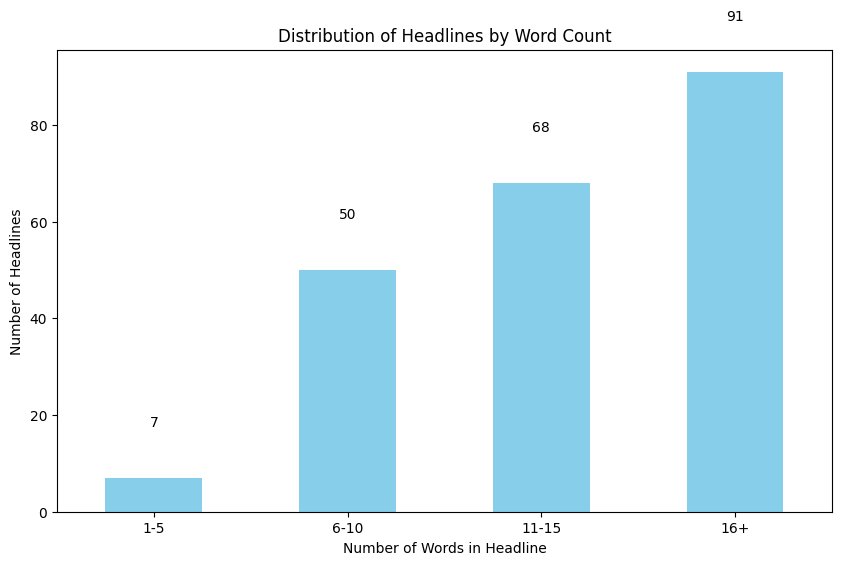

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bins = [1, 5, 10, 15, np.inf]
labels = ['1-5', '6-10', '11-15', '16+']
flat_df['headline_word_count_bins'] = pd.cut(flat_df['headline_word_count'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
bin_counts = flat_df['headline_word_count_bins'].value_counts(sort=False)

ax = bin_counts.plot(kind='bar', color='skyblue')

for i, count in enumerate(bin_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Headlines by Word Count')
plt.xlabel('Number of Words in Headline')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.show()

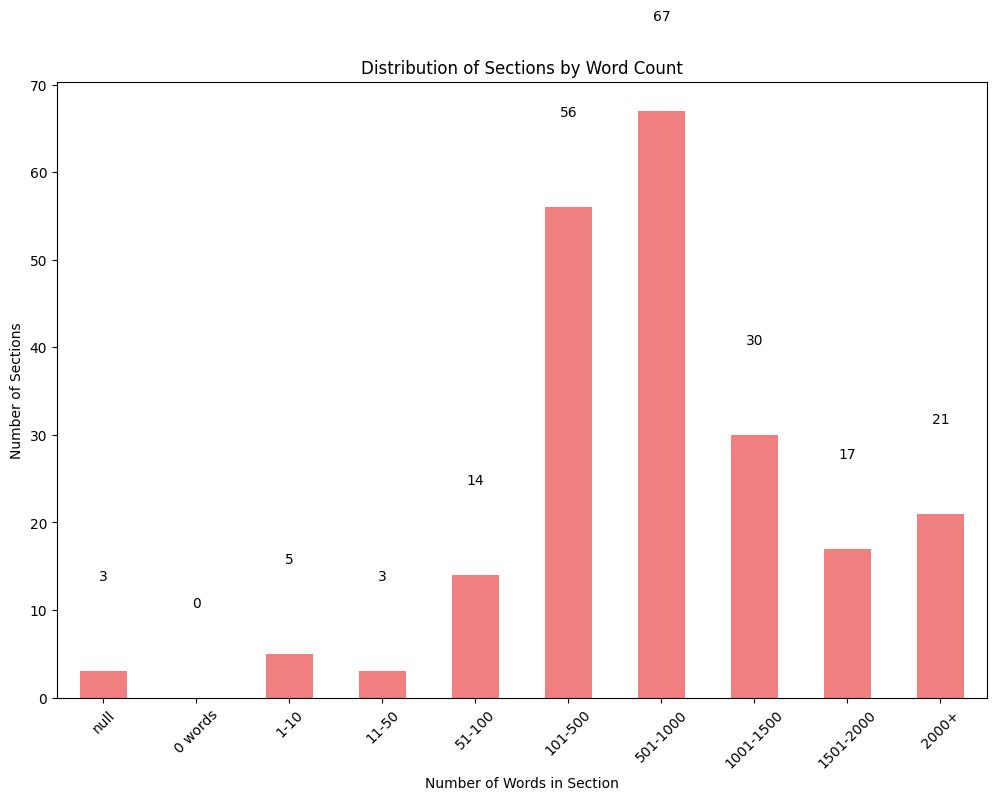

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bins = [-2, -1, 0, 10, 50, 100, 500, 1000, 1500, 2000, np.inf]
labels = ['null', '0 words', '1-10', '11-50', '51-100', '101-500', '501-1000', '1001-1500', '1501-2000', '2000+']
flat_df['section_word_count_bins'] = pd.cut(flat_df['section_word_count'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(12, 8))
bin_counts_sections = flat_df['section_word_count_bins'].value_counts(sort=False)

ax = bin_counts_sections.plot(kind='bar', color='lightcoral')

for i, count in enumerate(bin_counts_sections):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Sections by Word Count')
plt.xlabel('Number of Words in Section')
plt.ylabel('Number of Sections')
plt.xticks(rotation=45)
plt.show()


In [22]:
print(f"There are {len(flat_df)} headlines in the dataset")

There are 216 headlines in the dataset


# Manual inspection of the data

In [ ]:
weird_example = "../data/brief_pdfs/Docket18-1584_Brief001.pdf"

In [ ]:
# Use this to check the weird examples after running the pipeline
search_df = df[df['filename'] == weird_example]
search_df = search_df.reset_index(drop=True)
test_sections = search_df.iloc[0]['sections_alt']

for index, dictionary in enumerate(test_sections):
    print(f"Dictionary {index + 1}:")
    for key, value in dictionary.items():
        print(f"  Key: {key}, Value: {value}")
    print()

Dictionary 1:
  Key: I. The Appalachian Trail Segment Crossed By The ACP Project Is Not "Land In The National Park System" Under The Mineral Leasing Act, Value: . 
 The Forest Service used its management discre-
tion eight decades ago to approve and assist with con-
struction of the footpath, sign s, and shelters on national 
forest lands to help create the Appalachian Trail. But 
it did not transfer the lands traversed by that footpath 
to the Park Service. Neither did the Trails Act. 
 At times, the Park Service has characterized the 
Appalachian Trail as a unit of the National Park Sys-tem for its internal labeling purposes. See, e.g., Pet. 
App. 55a (No. 18-1584). And so me segments of the Trail 
are on lands inside national parks. But there is no ba-sis in the law for concluding that the entire 2,200-mile 
footpath has been transformed into "lands in the Na-
tional Park System" by a label. See 54 U.S.C. §§ 100102, 
100501. The term is a conven ient administrative catch-
all, evide

In [ ]:
null_section_row = flat_df[flat_df['section_word_count'] == -1].iloc[0]  

filename_with_null_section = null_section_row['filename']

original_data = df[df['filename'] == filename_with_null_section]['sections_alt'].values[0]

original_data

[{'I. AN EXPANSIVE INTERPRETATION OF THE ARMED CAREER CRIMINAL ACT WOULD BE ESPECIALLY HARMFUL TO CHILD OFFENDERS.': '5 \nUnder the Sixth Circuit\'s \nInterpretation of the Statute, Minor \nOffenders Will Enter Adulthood as \nCareer Criminals.  6 \nThis Court Has Long Recognized \nthat the Decisions of Child \nOffenders Are Not Indicative of \n"Career Criminal" Status.  10'},
 {'II. EXPANSIVE INTERPRETATION OF THE ARMED CAREER CRIMINAL ACT CONTRAVENES CONGRESSIONAL INTENT AND SHOULD BE NARROWED.': '19'},
 {'A. ACCA was Only Intended to Apply to the Narrow Subset of Irredeemable Offenders Identified after Multiple Opportunities for Rehabilitation.': None},
 {'B. The Act Requires a Narrow Interpretation of Temporal Separateness.': '24 \nCONCLUSION 28 \niii \nTABLE OF AUTHORITIES \nPage(s) \nCases \nAlaska v. Carlson, \n560 P.2d 26 (Alaska 1977) 23 \nBellotti v. Baird, \n443 U.S. 622 (1979) 11 \nBlount v. Clarke, \n890 F.3d 456 (4th Cir. 2018) 9 \nEddings v. Oklahoma, \n455 U.S. 104 (1982

In [ ]:
original_args = df[df['filename'] == filename_with_null_section]['cleaned_args'].values[0]

original_args

['I. AN EXPANSIVE INTERPRETATION OF THE ARMED CAREER CRIMINAL ACT WOULD BE ESPECIALLY HARMFUL TO CHILD OFFENDERS.',
 "A. Under the Sixth Circuit's Interpretation of the Statute, Minor Offenders Will Enter Adulthood as Career Criminals.",
 'B. This Court Has Long Recognized that the Decisions of Child Offenders Are Not Indicative of "Career Criminal" Status.',
 'II. EXPANSIVE INTERPRETATION OF THE ARMED CAREER CRIMINAL ACT CONTRAVENES CONGRESSIONAL INTENT AND SHOULD BE NARROWED.',
 'A. ACCA was Only Intended to Apply to the Narrow Subset of Irredeemable Offenders Identified after Multiple Opportunities for Rehabilitation.',
 'B. The Act Requires a Narrow Interpretation of Temporal Separateness.']

In this case, the period markers for the TOC didn't survive the pdf reader, so splitting on "conclusion" didn't work

In [ ]:
original_content = df[df['filename'] == filename_with_null_section]['cleaned_content_alt'].values[0]

print(original_content)

No. 20-5279 
IN THE 
Supreme Court of the United States 
WILLIAM DALE WOODEN, 
Petitioner, 
v. 
UNITED STATES OF AMERICA, 
Respondent. 
On Writ of Certiorari to the United States 
Court of Appeals for the Sixth Circuit 
BRIEF OF HUMAN RIGHTS FOR KIDS AS 
AMICUS CURIAE IN SUPPORT OF PETITIONER 
James Dold Tony W. Torain, II 
Suzanne S. La Pierre Counsel of Record 
John Ellem D. Jack Blum 
Human Rights for Kids Alexandra Brooks 
P.O. Box 5960 Polsinelli PC 
Washington, DC 20016 1401 I ("Eye") Street, N.W. 
(202) 573 -7758 Suite 800 
Washington, DC 20005 
(202) 783 -3300 
twtorain@polsinelli.com  
Attorneys for Amicus Curiae 
May 10, 2020 
TABLE OF CONTENTS 
TABLE OF CONTENTS  
TABLE OF AUTHORITIES iii 
INTEREST OF AMICUS CURIAE 1 
SUMMARY OF ARGUMENT 2 
ARGUMENT 5 
I. AN EXPANSIVE INTERPRETATION 
OF THE ARMED CAREER CRIMINAL 
ACT WOULD BE ESPECIALLY 
HARMFUL TO CHILD OFFENDERS. 5 
Under the Sixth Circuit's 
Interpretation of the Statute, Minor 
Offenders Will Enter Adulthood as 
Career C

In [ ]:
print(filename_with_null_section)

Docket20-5279_Brief008.pdf


In [ ]:
weird_example = "../data/brief_pdfs/Docket18-9526_Brief005.pdf"
weird_data = df[df['filename'] == weird_example]['sections_alt'].values[0]

In [ ]:
weird_args = df[df['filename'] == weird_example]['cleaned_args'].values[0]
for arg in weird_args:
  print(arg)

I. The United States and the Creek Nation Established a Reservation by Treaty
A. Text
B. Surrounding History
II. The Creek Allotment Act Preserved the Nation's Reservation
A. Text
B. Surrounding History
C. Hitchcock and Buster
III. Congress Deliberately Preserved the Creek Nation and Its Reservation in the Five Tribes Act
A. Text
B. Surrounding History and Missouri Railway
IV. Statehood Did Not Eradicate the Reservation Boundaries
A. Text
B. Surrounding History
C. The United States' Criminal Transfer Argument Lacks Textual Basis
V. The Nation's Post-Statehood Presence and Exercise of Governmental Power Confirm the Continued Existence of Its Reservation
A. The Muzzling of the Nation's Government in the Immediate Post-Statehood Period Does Not Connote Disestablishment
B. Present-Day Governance and Demographic Presence
VI. The State's Exaggerated Arguments About Consequences Provide No Support for Disestablishment
A. Criminal Consequences
B. Civil Consequences
C. The State Ignores the Det

In [ ]:
for section in weird_data:
  print(section)

{'I. The United States and the Creek Nation Established a Reservation by Treaty': '.'}
{'A. Text': None}
{'A. Text': None}
{'A. Text': None}
{'A. Text': 'xt \n \n Oklahoma\'s claim that a Reservation was never established for the Nation in the Indian Territory is divorced from both text and history.  The \nTreaty of 1866 expressly refers to the Nation\'s \nTerritory as a "Reservation."  Art. IX, 14 Stat. 785, 788 (1866).  That was no slip of the pen, but rather reflected the defining characteristics of the Creek territory. \n \n The term "reservation" has long been "used in the land law to describe any body of land reserved … from sale for any purpose.  It may be a military \n \n \n \n \n \n6 \n \n reservation, or an Indian reservation ... [W]hen \nCongress has once established a reservation, all tracts included within it remain a part of the reservation \nuntil separated therefrom by Congress."  United \nStates v. Celestine , 215 U.S. 278, 285 (1909). \n  The statutory and treaty text

There are a few strange things that happened here, but one of them is the fact that because of an encoding error, the II. headline was not at the beginning of a newline, so the matcher failed to find it. There also seems to be trouble finding short sections, probably because of the way I did some of the buffering in the matcher. That should be fixable.

In [ ]:
weird_text = weird_data = df[df['filename'] == weird_example]['cleaned_text_alt'].values[0]
print(weird_text)

  No. 18-9526 
 
IN THE 
 
 
JIMCY MCGIRT, 
Petitioner,
v. 
OKLAHOMA ,  
     Respondent . 
_____________ 
 
On Writ of Certiorari to the 
Oklahoma Court of Criminal Appeals 
_____________ 
BRIEF FOR AMICUS CURIAE   
MUSCOGEE (CREEK) NATION IN SUPPORT 
OF PETITIONER  
_____________ 
 
ROGER WILEY 
ATTORNEY GENERAL  
KYLE HASKINS  
FIRST ASSISTANT  
    ATTORNEY GENERAL  
MUSCOGEE (CREEK )        
NATION  
Post Office Box 580 Okmulgee, OK 74447 (918)
 295-9720 
  
RIYAZ A. KANJI 
     Counsel of Record 
DAVID A. GIAMPETRONI  
KANJI & KATZEN , PLLC 
303 Detroit St., Ste 400 Ann Arbor, MI 48104 (734)
 769-5400 
rkanji@kanjikatzen.com   C
ORY J. ALBRIGHT  
PHILIP H. TINKER  
LYNSEY R. GAUDIOSO  
KANJI & KATZEN , PLLC 
401 Second Ave. S., Ste 700 
Seattle, WA 98104 (206)
 344-8100 
  
Counsel for Amicus Curiae Muscogee (Creek) Nation

 
 
 
 
 
i 
  
 TABLE OF CONTENTS 
Page 
TABLE OF AUTHORITIES ..................................... iii 
INTEREST OF AMIC US CURIAE .........................

# Widgets to inspect the data

**Key for the data fields**

* filename: Name of the downloaded pdf
* text: The raw text as read from pdf
* docket_num: The scotus docket number
* court: Court where brief was filed
* url: Link to the hosted pdf, probably the quickest way to view the original pdf
* cleaned_text_alt: The full text with preprocessing, e.g. replacing smart quotes and other encoding issues
* cleaned_content_alt: The content split from the table of contents. It may or may not include the table of authorities
* arguments: The arguments as represented by the headers in a string, with each header separated by a newline
cleaned_args: The argument strings split into a python list
* sections_alt: JSON object with the header as key and relevant section as value
* arg_structure: A graph representing the argument structure. Stored as a dictionary with the 'index', 'header', 'parent', 'child' keys.

In [ ]:
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets
import os
from pdf2image import convert_from_path

# Define a class to encapsulate the widget functionality
class DataFrameViewer:
    def __init__(self, df, default_column='text'):
        self.df = df
        self.index = 0
        self.column = default_column
        self.current_images = []

        # Create the buttons
        self.next_button = widgets.Button(description="Next")
        self.prev_button = widgets.Button(description="Previous")
        self.random_button = widgets.Button(description="Random Row")
        self.pdf_button = widgets.Button(description="Display PDF")
        self.column_selector = widgets.Dropdown(options=df.columns, value=default_column, description='Column:')

        # Assign the functions to the buttons
        self.next_button.on_click(self.next_row)
        self.prev_button.on_click(self.previous_row)
        self.random_button.on_click(self.random_row)
        self.pdf_button.on_click(self.display_pdf_button) 
        self.column_selector.observe(self.on_column_change, names='value')

        # Display the buttons and the first row
        self.display_row(self.index, self.column)

    def display_row(self, index, column):
        clear_output(wait=True)  # Clear previous row output but not the buttons
        print(f"Row {index} (Column: {column}):")
        display(self.df.loc[index, column])  # Display only the selected column for that row
        display(self.prev_button, self.next_button, self.random_button, self.pdf_button, self.column_selector)  # Ensure all buttons stay visible

        if self.current_images:
            for i, image in enumerate(self.current_images):
                print(f"Displaying page {i + 1} of {len(self.current_images)}")
                display(image)


    def next_row(self, b):
        self.clear_images()  # Clear the images when moving to a new row
        if self.index < len(self.df) - 1:
            self.index += 1
        self.display_row(self.index, self.column)

    def previous_row(self, b):
        self.clear_images()  # Clear the images when moving to a new row
        if self.index > 0:
            self.index -= 1
        self.display_row(self.index, self.column)

    def random_row(self, b):
        self.clear_images()  # Clear the images when moving to a new row
        self.index = self.df.sample(random_state=42).index[0]
        self.display_row(self.index, self.column)

    def on_column_change(self, change):
        self.column = change['new']
        self.display_row(self.index, self.column)

    # Function to display the PDF when the button is clicked
    def display_pdf_button(self, b):
        filename = self.df.loc[self.index, 'filename'] 
        self.display_pdf_images(filename)

    def display_pdf_images(self, filename):
        filepath = f"../data/brief_pdfs/{filename}"
        if os.path.exists(filepath):
            try:
                images = convert_from_path(filepath)

                # Display each page as an image
                for i, image in enumerate(images):
                    self.current_images.append(image)
                    '''
                    print(f"Displaying page {i + 1} of {len(images)}")
                    display(image)
                    '''

                if self.current_images:
                  for i, image in enumerate(self.current_images):
                      print(f"Displaying page {i + 1} of {len(self.current_images)}")
                      display(image)

            except Exception as e:
                print(f"Error converting PDF to images: {e}")
        else:
            print(f"PDF not found for filename: {filename}")

     # Function to clear images when switching to a new row
    def clear_images(self):
        self.current_images = []

viewer = DataFrameViewer(df)


Row 0 (Column: text):


'No. 20-5279  \n \nIN THE \nSupreme Court of the United States \n__________ \n \nWILLIAM DALE WOODEN , \nPetitioner , \n \nv. \n \n \nUNITED STATES OF AMERICA , \nRespondent . \n__________ \n \nOn Writ of Certiorari \nto the United States Court of Appeals \nfor the Sixth Circuit  \n__________ \n \nBRIEF OF FAMM \nAS AMICUS CURIAE  \nIN SUPPORT OF PETITIONER \n__________ \n \n M\nARY PRICE \nGENERAL COUNSEL  \nFAMM \n1100 H Street, N.W. \nSuite 1000 \nWashington, D.C. 20005 (202) 822-6700 \n \n  \nMay 10, 2021\n  \nGREGORY G. RAPAWY  \n   Counsel of Record \nMINSUK HAN \nKELLOGG , HANSEN , TODD, \n   FIGEL & FREDERICK , \n   P.L.L.C. \n1615 M Street, N.W. \nSuite 400 \nWashington, D.C. 20036 (202) 326-7900 \n(grapawy@kellogghansen.com) \n \nTABLE OF CONTENTS \nPage \nTABLE OF AUTH ORITIES ....................................... ii \nINTEREST OF AMICUS CURIAE  ............................ 1 \nINTRODUCTION AN D SUMMARY ......................... 2 \nARGUMEN T ..............................

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Button(description='Random Row', style=ButtonStyle())

Button(description='Display PDF', style=ButtonStyle())

Dropdown(description='Column:', index=1, options=('filename', 'text', 'docket_num', 'court', 'arguments', 'cle…

In [ ]:
headline_df = flat_df[flat_df['headline_word_count_bins'] == '1-5'].reset_index(drop=True)

section_df = flat_df[flat_df['section_word_count_bins'].isin(['null', '1-10', '11-50', '51-100'])].reset_index(drop=True)

In [ ]:
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

# Define a class to encapsulate the widget functionality for headlines
class HeadlineDataFrameViewer:
    def __init__(self, df, default_column='filename'):
        self.df = df
        self.index = 0
        self.column = default_column
        self.current_images = []

        # Create the buttons
        self.next_button = widgets.Button(description="Next")
        self.prev_button = widgets.Button(description="Previous")
        self.random_button = widgets.Button(description="Random Row")
        self.pdf_button = widgets.Button(description="Display PDF")
        self.column_selector = widgets.Dropdown(options=df.columns, value=default_column, description='Column:')

        # Assign the functions to the buttons
        self.next_button.on_click(self.next_row)
        self.prev_button.on_click(self.previous_row)
        self.random_button.on_click(self.random_row)
        self.pdf_button.on_click(self.display_pdf_button)
        self.column_selector.observe(self.on_column_change, names='value')

        # Display the buttons and the first row
        self.display_row(self.index, self.column)

    def display_row(self, index, column):
        clear_output(wait=True)  # Clear previous row output but not the buttons
        print(f"Row {index} (Column: {column}):")
        display(self.df.loc[index, column])  # Display only the selected column for that row
        display(self.prev_button, self.next_button, self.random_button, self.pdf_button, self.column_selector)  # Ensure all buttons stay visible

        if self.current_images:
            for i, image in enumerate(self.current_images):
                print(f"Displaying page {i + 1} of {len(self.current_images)}")
                display(image)

    def next_row(self, b):
        self.clear_images()
        if self.index < len(self.df) - 1:
            self.index += 1
        self.display_row(self.index, self.column)

    def previous_row(self, b):
        self.clear_images()
        if self.index > 0:
            self.index -= 1
        self.display_row(self.index, self.column)

    def random_row(self, b):
        self.clear_images()
        self.index = self.df.sample(random_state=42).index[0]
        self.display_row(self.index, self.column)

    def on_column_change(self, change):
        self.column = change['new']
        self.display_row(self.index, self.column)

    # Function to display the PDF when the button is clicked
    def display_pdf_button(self, b):
        filename = self.df.loc[self.index, 'filename']  # Assuming 'filename' column holds the filenames
        self.display_pdf_images(filename)

    def display_pdf_images(self, filename):
        filepath = f"../data/brief_pdfs/{filename}"
        if os.path.exists(filepath):
            try:
                # Convert all pages of the PDF to images
                images = convert_from_path(filepath)

                # Display each page as an image
                for i, image in enumerate(images):
                    self.current_images.append(image)
                    '''
                    print(f"Displaying page {i + 1} of {len(images)}")
                    display(image)
                    '''

                if self.current_images:
                  for i, image in enumerate(self.current_images):
                      print(f"Displaying page {i + 1} of {len(self.current_images)}")
                      display(image)

            except Exception as e:
                print(f"Error converting PDF to images: {e}")
        else:
            print(f"PDF not found for filename: {filename}")

     # Function to clear images when switching to a new row
    def clear_images(self):
        self.current_images = []

headline_viewer = HeadlineDataFrameViewer(headline_df)


Row 0 (Column: filename):


'Docket20-828_Brief003.pdf'

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Button(description='Random Row', style=ButtonStyle())

Button(description='Display PDF', style=ButtonStyle())

Dropdown(description='Column:', options=('filename', 'headline', 'headline_word_count', 'section', 'section_wo…

In [ ]:
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

# Define a class to encapsulate the widget functionality for section_df
class SectionDataFrameViewer:
    def __init__(self, df, default_column='filename'):
        self.df = df
        self.index = 0
        self.column = default_column
        self.current_images = []

        # Create the buttons
        self.next_button = widgets.Button(description="Next")
        self.prev_button = widgets.Button(description="Previous")
        self.random_button = widgets.Button(description="Random Row")
        self.pdf_button = widgets.Button(description="Display PDF")
        self.column_selector = widgets.Dropdown(options=df.columns, value=default_column, description='Column:')

        # Assign the functions to the buttons
        self.next_button.on_click(self.next_row)
        self.prev_button.on_click(self.previous_row)
        self.random_button.on_click(self.random_row)
        self.pdf_button.on_click(self.display_pdf_button)
        self.column_selector.observe(self.on_column_change, names='value')

        # Display the buttons and the first row
        self.display_row(self.index, self.column)

    def display_row(self, index, column):
        clear_output(wait=True)  # Clear previous row output but not the buttons
        print(f"Row {index} (Column: {column}):")
        display(self.df.loc[index, column])  # Display only the selected column for that row
        display(self.prev_button, self.next_button, self.random_button, self.pdf_button, self.column_selector)  # Ensure all buttons stay visible

        if self.current_images:
            for i, image in enumerate(self.current_images):
                print(f"Displaying page {i + 1} of {len(self.current_images)}")
                display(image)

    def next_row(self, b):
        self.clear_images()
        if self.index < len(self.df) - 1:
            self.index += 1
        self.display_row(self.index, self.column)

    def previous_row(self, b):
        self.clear_images()
        if self.index > 0:
            self.index -= 1
        self.display_row(self.index, self.column)

    def random_row(self, b):
        self.clear_images()
        self.index = self.df.sample(random_state=42).index[0]
        self.display_row(self.index, self.column)

    def on_column_change(self, change):
        self.column = change['new']
        self.display_row(self.index, self.column)

    # Function to display the PDF when the button is clicked
    def display_pdf_button(self, b):
        filename = self.df.loc[self.index, 'filename'] 
        self.display_pdf_images(filename)

    def display_pdf_images(self, filename):
        filepath = f"../data/brief_pdfs/{filename}"
        if os.path.exists(filepath):
            try:
                images = convert_from_path(filepath)

                # Display each page as an image
                for i, image in enumerate(images):
                    self.current_images.append(image)
                    '''
                    print(f"Displaying page {i + 1} of {len(images)}")
                    display(image)
                    '''

                if self.current_images:
                  for i, image in enumerate(self.current_images):
                      print(f"Displaying page {i + 1} of {len(self.current_images)}")
                      display(image)

            except Exception as e:
                print(f"Error converting PDF to images: {e}")
        else:
            print(f"PDF not found for filename: {filename}")

     # Function to clear images when switching to a new row
    def clear_images(self):
        self.current_images = []

section_viewer = SectionDataFrameViewer(section_df)


Row 0 (Column: filename):


'Docket20-5279_Brief008.pdf'

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Button(description='Random Row', style=ButtonStyle())

Button(description='Display PDF', style=ButtonStyle())

Dropdown(description='Column:', options=('filename', 'headline', 'headline_word_count', 'section', 'section_wo…

In [ ]:
df_4 = flat_df[flat_df['headline_word_count'] == 4].reset_index(drop=True)
df_5 = flat_df[flat_df['headline_word_count'] == 5].reset_index(drop=True)
df_6 = flat_df[flat_df['headline_word_count'] == 6].reset_index(drop=True)
df_7 = flat_df[flat_df['headline_word_count'] == 7].reset_index(drop=True)

In [ ]:
df_4.head()

,filename,headline,headline_word_count,section,section_word_count,cleaned_text_alt,cleaned_content_alt,cleaned_args,sections_alt,headline_word_count_bins,section_word_count_bins
0,Docket20-828_Brief003.pdf,I. CERTIORARI IS PREMATURE,4,. \nCertiorari is premature for four reasons....,902,No. 20-828 \nIN THE \nSupreme Court of the Uni...,.............................. ..................,"[I. CERTIORARI IS PREMATURE, II. THERE IS NO C...",[{'I. CERTIORARI IS PREMATURE': '. Certiorar...,1-5,501-1000
1,Docket20-828_Brief011.pdf,A. The State-Secrets Privilege,4,It has a strong interest \nin ensuring section...,493,\n No. 20-828 \n=============================...,.................................................,"[I. The Pre-FISA Legal Landscape, II. FISA, A....",[{'A. The State-Secrets Privilege': 'It has a ...,1-5,101-500
2,Docket20-828_Brief011.pdf,B. FISA's Statutory History,4,FISA was introduced in identical House and Sen...,249,\n No. 20-828 \n=============================...,.................................................,"[I. The Pre-FISA Legal Landscape, II. FISA, A....",[{'A. The State-Secrets Privilege': 'It has a ...,1-5,101-500
3,Docket20-443_Brief006.pdf,A. Standard of review,4,.\nIn cases on direct review from both federal...,276,No. 20-443\nIN THE\nSupreme Court of the Unite...,. . . . . . . . . . . . . . . . . . . . . . . ...,[I. Pretrial publicity must be assessed differ...,[{'I. Pretrial publicity must be assessed diff...,1-5,101-500
4,Docket20-443_Brief006.pdf,B. This Court's precedents,4,.\nThis Court's precedents on pretrial publici...,114,No. 20-443\nIN THE\nSupreme Court of the Unite...,. . . . . . . . . . . . . . . . . . . . . . . ...,[I. Pretrial publicity must be assessed differ...,[{'I. Pretrial publicity must be assessed diff...,1-5,101-500


In [ ]:
print(f"There are {len(df_4)} headlines of len 4 in the dataset")

There are 258 headlines of len 4 in the dataset


In [ ]:
headline_viewer_4 = HeadlineDataFrameViewer(df_4)

Row 0 (Column: filename):


'Docket20-828_Brief003.pdf'

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Button(description='Random Row', style=ButtonStyle())

Button(description='Display PDF', style=ButtonStyle())

Dropdown(description='Column:', options=('filename', 'headline', 'headline_word_count', 'section', 'section_wo…

In [ ]:
print(f"There are {len(df_5)} headlines of len 5 in the dataset")

There are 394 headlines of len 5 in the dataset


In [ ]:
headline_viewer_5 = HeadlineDataFrameViewer(df_5)

Row 0 (Column: filename):


'Docket20-828_Brief009.pdf'

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Button(description='Random Row', style=ButtonStyle())

Button(description='Display PDF', style=ButtonStyle())

Dropdown(description='Column:', options=('filename', 'headline', 'headline_word_count', 'section', 'section_wo…

In [ ]:
print(f"There are {len(df_6)} headlines of len 6 in the dataset")

There are 819 headlines of len 6 in the dataset


In [ ]:
headline_viewer_6 = HeadlineDataFrameViewer(df_6)

Row 0 (Column: filename):


'Docket20-5279_Brief009.pdf'

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Button(description='Random Row', style=ButtonStyle())

Button(description='Display PDF', style=ButtonStyle())

Dropdown(description='Column:', options=('filename', 'headline', 'headline_word_count', 'section', 'section_wo…

In [ ]:
print(f"There are {len(df_7)} headlines of len 7 in the dataset")

There are 931 headlines of len 7 in the dataset


In [ ]:
headline_viewer_7 = HeadlineDataFrameViewer(df_7)

Row 0 (Column: filename):


'Docket20-828_Brief015.pdf'

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Button(description='Random Row', style=ButtonStyle())

Button(description='Display PDF', style=ButtonStyle())

Dropdown(description='Column:', options=('filename', 'headline', 'headline_word_count', 'section', 'section_wo…